In [1]:
# import the necessary packages 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec

In [2]:
data = pd.read_csv("creditcard.csv") 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [4]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [5]:
print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

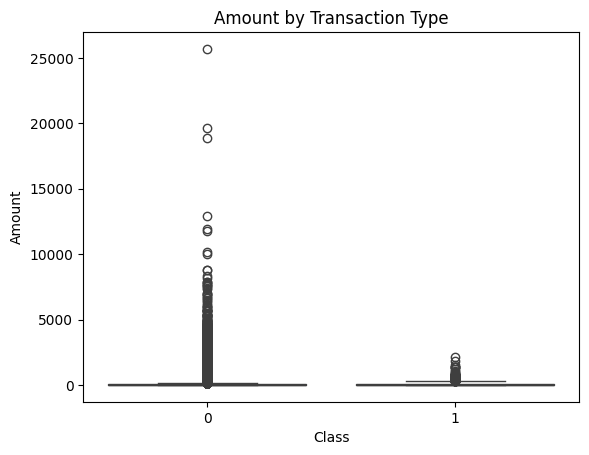

In [6]:
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Amount by Transaction Type")
plt.show()


In [7]:
print("details of valid transaction") 
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

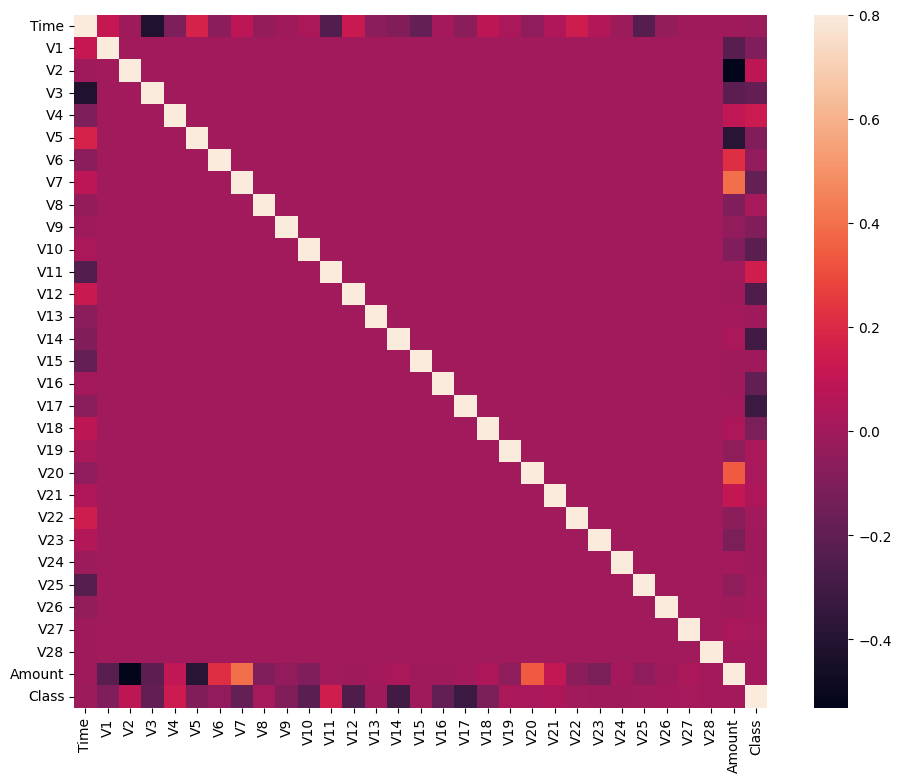

In [8]:
corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [9]:
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape)  
xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


# Random Forest Classifier

In [38]:
from sklearn.model_selection import train_test_split 
xTrain, xTest, yTrain, yTest = train_test_split( 
        xData, yData, test_size = 0.2, random_state = 42) 

In [39]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
yPred = rfc.predict(xTest)
yProb = rfc.predict_proba(xTest)[:, 1]

In [40]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, roc_auc_score
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
roc_auc = roc_auc_score(yTest, yProb)
print("The ROC AUC score is {}".format(roc_auc)) 

The model used is Random Forest classifier
The accuracy is 0.9995611109160493
The precision is 0.974025974025974
The recall is 0.7653061224489796
The F1-Score is 0.8571428571428571
The ROC AUC score is 0.9524553930322832


# Logistic Regression

In [41]:
from sklearn.preprocessing import StandardScaler

# Create a copy to avoid modifying original
data_scaled = data.copy()

# Normalize 'Amount'
data_scaled['Amount'] = StandardScaler().fit_transform(data_scaled['Amount'].values.reshape(-1, 1))

# Drop 'Time' not useful
data_scaled = data_scaled.drop(['Time'], axis=1)


Splitting the copied data for logistic regression 

In [42]:
X1 = data_scaled.drop('Class', axis=1)
y1 = data_scaled['Class']

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, stratify=y1, random_state=42
)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train the model
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X1_train, y1_train)

# Predictions
y_pred_log = log_reg.predict(X1_test)
y_prob_log = log_reg.predict_proba(X1_test)[:, 1]

# Evaluation
acc_log = accuracy_score(y1_test, y_pred_log)
prec_log = precision_score(y1_test, y_pred_log)
rec_log = recall_score(y1_test, y_pred_log)
f1_log = f1_score(y1_test, y_pred_log)
roc_auc_log = roc_auc_score(y1_test, y_prob_log)

print("Logistic Regression Results:")
print(f"Accuracy:  {acc_log}")
print(f"Precision: {prec_log}")
print(f"Recall:    {rec_log}")
print(f"F1-Score:  {f1_log}")
print(f"ROC AUC:   {roc_auc_log}")



Logistic Regression Results:
Accuracy:  0.9745444331308591
Precision: 0.0587467362924282
Recall:    0.9183673469387755
F1-Score:  0.11042944785276074
ROC AUC:   0.9713789004628302


# XGBoost 

In [44]:
!pip install xgboost --q



[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: C:\Users\DELL\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the XGBoost Classifier
xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y1_train[y1_train == 0]) / len(y1_train[y1_train == 1])),  # handle imbalance
    eval_metric='logloss',
    random_state=42
)

In [46]:
# Train the model
xgb_clf.fit(X1_train, y1_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X1_test)
y_prob_xgb = xgb_clf.predict_proba(X1_test)[:, 1]

# Evaluation
acc_xgb = accuracy_score(y1_test, y_pred_xgb)
prec_xgb = precision_score(y1_test, y_pred_xgb)
rec_xgb = recall_score(y1_test, y_pred_xgb)
f1_xgb = f1_score(y1_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y1_test, y_prob_xgb)

# Print results
print("XGBoost Classifier Results:")
print(f"Accuracy:  {acc_xgb}")
print(f"Precision: {prec_xgb}")
print(f"Recall:    {rec_xgb}")
print(f"F1-Score:  {f1_xgb}")
print(f"ROC AUC:   {roc_auc_xgb}")

XGBoost Classifier Results:
Accuracy:  0.9972613321161476
Precision: 0.375
Recall:    0.8877551020408163
F1-Score:  0.5272727272727273
ROC AUC:   0.9758922649673263


In [47]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [acc_log, acc , acc_xgb],
    'Precision': [prec_log, prec , prec_xgb],
    'Recall': [rec_log, rec , rec_xgb],
    'F1-Score': [f1_log, f1 , f1_xgb],
    'ROC AUC': [roc_auc_log , roc_auc , roc_auc_xgb]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.974544   0.058747  0.918367  0.110429  0.971379
1        Random Forest  0.999561   0.974026  0.765306  0.857143  0.952455
2              XGBoost  0.997261   0.375000  0.887755  0.527273  0.975892


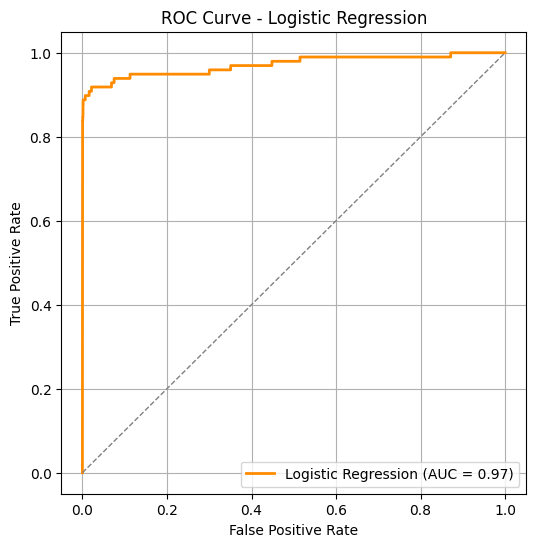

In [48]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds
fpr_log, tpr_log, _ = roc_curve(y1_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()



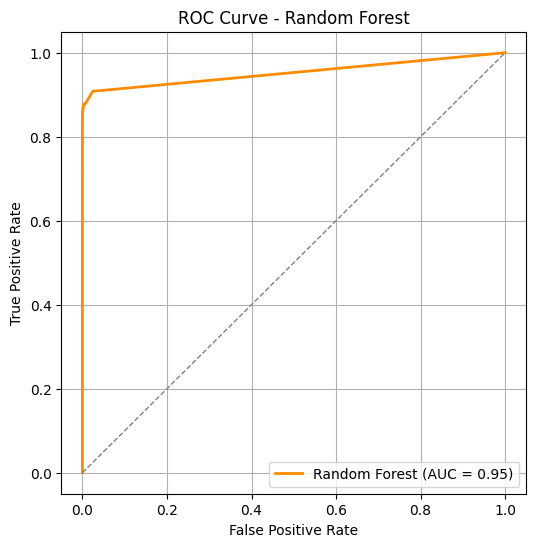

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds
fpr_log, tpr_log, _ = roc_curve(yTest, yProb)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.show()


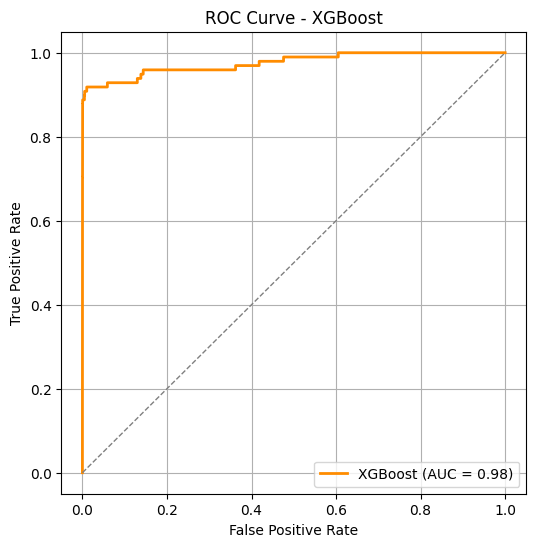

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds
fpr_log, tpr_log, _ = roc_curve(y1_test, y_prob_xgb)
roc_auc_log = auc(fpr_log, tpr_log)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_log:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()
